## Setup

In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# the data is from https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/code

## Data Wrangling

##### Data collection

In [4]:
movies_df = pd.read_csv('Data/movies_metadata.csv', low_memory=False)

In [5]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


##### Data cleaning

In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
movies_df.sample(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
4916,False,NaN,40000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",NaN,4965,tt0160399,en,Impostor,"Gary Sinise plays Spencer Olham, a top-secret ...",...,2001-12-03,0.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"In the Future, not everyone is who they seem t...",Impostor,False,6.1,136.0
4688,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45864,tt0245891,en,Extreme Days,"As four lifelong friends, Will, Bryan, Matt, a...",...,2001-09-28,1.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Life's a trip......,Extreme Days,False,5.9,5.0
40915,False,NaN,2700000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,340103,tt3976144,en,The Monster,A mother and her 10-year old daughter are trap...,...,2016-11-11,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Stay in the light,The Monster,False,5.4,119.0
27246,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,123354,tt0049787,en,The Spanish Gardener,British diplomat Harrington Brande takes up hi...,...,1956-12-25,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Spanish Gardener,False,6.7,3.0
2998,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31582,tt0155711,en,Flawless,An ultraconservative police officer suffers a ...,...,1999-11-26,4488529.0,112.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Flawless,False,5.9,56.0


In [8]:
columns_to_drop = ['belongs_to_collection', 'homepage', 'poster_path', 'video', 'spoken_languages']
movies_df.drop(columns=columns_to_drop, inplace=True)

In [9]:
import ast
# change from str to dict
movies_df['genres'] = movies_df['genres'].apply(ast.literal_eval)

In [10]:
movies_df['production_companies'] = movies_df['production_companies'].fillna('[]')
movies_df['production_companies'] = movies_df['production_companies'].apply(ast.literal_eval)

In [11]:
movies_df['production_countries'] = movies_df['production_countries'].fillna('[]')
movies_df['production_countries'] = movies_df['production_countries'].apply(ast.literal_eval)

In [12]:
def extract_names_from_dicts(dict_list):
    if isinstance(dict_list, list):
        if dict_list: 
            return [obj['name'] for obj in dict_list]
    return []

In [13]:
movies_df['genres'] = movies_df['genres'].apply(extract_names_from_dicts)

In [14]:
movies_df['production_companies'] = movies_df['production_companies'].apply(extract_names_from_dicts)

In [15]:
movies_df['production_countries'] = movies_df['production_countries'].apply(extract_names_from_dicts)

In [16]:
movies_df.sample(5)

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
34066,False,0,[Documentary],291343,tt3626804,en,Nowitzki: The Perfect Shot,Documentary about basketball star Dirk Nowitzki.,0.981528,[Broadview Pictures],[Germany],2014-09-18,0.0,106.0,Released,NaN,Nowitzki: The Perfect Shot,6.8,25.0
1091,False,6788000,"[Comedy, Fantasy, Family]",10379,tt0101775,en,Drop Dead Fred,When Elizabeth returns to her mother's home af...,7.88101,[PolyGram Filmed Entertainment],"[United Kingdom, United States of America]",1991-04-19,13878334.0,103.0,Released,Dishes. Relationships. Wind. This guy breaks e...,Drop Dead Fred,5.9,107.0
25501,False,10000000,[Drama],87093,tt1126590,en,Big Eyes,"The story of the awakening of the painter, Mar...",7.412826,"[The Weinstein Company, Silverwood Films, Elec...","[Canada, United States of America]",2014-12-24,28883511.0,105.0,Released,She created it. He sold it. And they bought it.,Big Eyes,6.8,1236.0
11903,False,0,"[Drama, Family]",43229,tt0050567,en,Johnny Tremain,When an injury bars him from pursuing his trad...,1.403067,[Walt Disney Productions],[United States of America],1957-06-15,0.0,80.0,Released,Hungry for Adventure...Burning to Fight!,Johnny Tremain,5.7,8.0
1512,False,90000000,"[Drama, Science Fiction, Mystery]",686,tt0118884,en,Contact,Contact is a science fiction film about an enc...,14.374866,"[Warner Bros., South Side Amusement Company]",[United States of America],1997-07-11,171120329.0,150.0,Released,"If it's just us, it seems like an awful waste ...",Contact,7.2,1338.0


In [17]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45466 non-null  object 
 1   budget                45466 non-null  object 
 2   genres                45466 non-null  object 
 3   id                    45466 non-null  object 
 4   imdb_id               45449 non-null  object 
 5   original_language     45455 non-null  object 
 6   original_title        45466 non-null  object 
 7   overview              44512 non-null  object 
 8   popularity            45461 non-null  object 
 9   production_companies  45466 non-null  object 
 10  production_countries  45466 non-null  object 
 11  release_date          45379 non-null  object 
 12  revenue               45460 non-null  float64
 13  runtime               45203 non-null  float64
 14  status                45379 non-null  object 
 15  tagline            

In [18]:
movies_df['popularity'].unique()

array(['21.946943', '17.015539', '11.7129', ..., '0.903007', '0.003503',
       '0.163015'], dtype=object)

In [19]:
movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors='coerce')
movies_df['popularity'] = movies_df['popularity'].fillna(0)
movies_df['popularity'] = movies_df['popularity'].astype('float64')

In [20]:
movies_df['budget'].unique()

array(['30000000', '65000000', '0', ..., '3417000', '25868826', '1254040'],
      dtype=object)

In [21]:
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')

In [22]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45466 non-null  object 
 1   budget                45463 non-null  float64
 2   genres                45466 non-null  object 
 3   id                    45466 non-null  object 
 4   imdb_id               45449 non-null  object 
 5   original_language     45455 non-null  object 
 6   original_title        45466 non-null  object 
 7   overview              44512 non-null  object 
 8   popularity            45466 non-null  float64
 9   production_companies  45466 non-null  object 
 10  production_countries  45466 non-null  object 
 11  release_date          45379 non-null  object 
 12  revenue               45460 non-null  float64
 13  runtime               45203 non-null  float64
 14  status                45379 non-null  object 
 15  tagline            

In [23]:
movies_df['status'].value_counts()

status
Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: count, dtype: int64

In [24]:
movies_df['adult'].unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

In [25]:
weird_data = movies_df['adult'].isin([' - Written by Ørnås',
                                              ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
                                              ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'])
movies_df.loc[weird_data, 'adult'] = 'False'
movies_df['adult'] = movies_df['adult'].map({'True': 1, 'False': 0})
movies_df

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,0,30000000.0,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
1,0,65000000.0,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,0,0.0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,0,16000000.0,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,0,0.0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0.0,"[Drama, Family]",439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,[],[Iran],NaN,0.0,90.0,Released,Rising and falling between a man and woman,Subdue,4.0,1.0
45462,0,0.0,[Drama],111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,[Sine Olivia],[Philippines],2011-11-17,0.0,360.0,Released,NaN,Century of Birthing,9.0,3.0
45463,0,0.0,"[Action, Drama, Thriller]",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,[American World Pictures],[United States of America],2003-08-01,0.0,90.0,Released,A deadly game of wits.,Betrayal,3.8,6.0
45464,0,0.0,[],227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,[Yermoliev],[Russia],1917-10-21,0.0,87.0,Released,NaN,Satan Triumphant,0.0,0.0


In [26]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45466 non-null  int64  
 1   budget                45463 non-null  float64
 2   genres                45466 non-null  object 
 3   id                    45466 non-null  object 
 4   imdb_id               45449 non-null  object 
 5   original_language     45455 non-null  object 
 6   original_title        45466 non-null  object 
 7   overview              44512 non-null  object 
 8   popularity            45466 non-null  float64
 9   production_companies  45466 non-null  object 
 10  production_countries  45466 non-null  object 
 11  release_date          45379 non-null  object 
 12  revenue               45460 non-null  float64
 13  runtime               45203 non-null  float64
 14  status                45379 non-null  object 
 15  tagline            

In [27]:
print(movies_df.dtypes)

adult                     int64
budget                  float64
genres                   object
id                       object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count              float64
dtype: object


In [28]:
for column in movies_df.columns:
    if movies_df[column].apply(lambda x: isinstance(x, list)).any():
        movies_df[column] = movies_df[column].apply(tuple)

In [29]:
duplicates_for_movies = movies_df[movies_df.duplicated()]
print(duplicates_for_movies)

       adult    budget                                          genres  \
1465       0       0.0                                (Drama, Romance)   
9165       0       0.0                        (Crime, Drama, Thriller)   
9327       0       0.0  (Adventure, Animation, Drama, Action, Foreign)   
13375      0       0.0                             (Thriller, Mystery)   
16764      0       0.0                             (Thriller, Mystery)   
21165      0       0.0               (Fantasy, Drama, Science Fiction)   
21854      0       0.0             (Drama, Science Fiction, Animation)   
22151      0       0.0               (Action, Horror, Science Fiction)   
23044      0       0.0                                        (Drama,)   
24844      0       0.0                                 (Comedy, Drama)   
28860      0       0.0                                 (Drama, Comedy)   
29374      0       0.0                                (Drama, Foreign)   
35798      0       0.0                

In [30]:
movies_df = movies_df.drop_duplicates()
print("DataFrame after removing duplicates:")
movies_df

DataFrame after removing duplicates:


,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,0,30000000.0,"(Animation, Comedy, Family)",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"(Pixar Animation Studios,)","(United States of America,)",1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
1,0,65000000.0,"(Adventure, Fantasy, Family)",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"(TriStar Pictures, Teitler Film, Interscope Co...","(United States of America,)",1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,0,0.0,"(Romance, Comedy)",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"(Warner Bros., Lancaster Gate)","(United States of America,)",1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,0,16000000.0,"(Comedy, Drama, Romance)",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,"(Twentieth Century Fox Film Corporation,)","(United States of America,)",1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,0,0.0,"(Comedy,)",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"(Sandollar Productions, Touchstone Pictures)","(United States of America,)",1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0.0,"(Drama, Family)",439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,(),"(Iran,)",NaN,0.0,90.0,Released,Rising and falling between a man and woman,Subdue,4.0,1.0
45462,0,0.0,"(Drama,)",111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"(Sine Olivia,)","(Philippines,)",2011-11-17,0.0,360.0,Released,NaN,Century of Birthing,9.0,3.0
45463,0,0.0,"(Action, Drama, Thriller)",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"(American World Pictures,)","(United States of America,)",2003-08-01,0.0,90.0,Released,A deadly game of wits.,Betrayal,3.8,6.0
45464,0,0.0,(),227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,"(Yermoliev,)","(Russia,)",1917-10-21,0.0,87.0,Released,NaN,Satan Triumphant,0.0,0.0


In [31]:
movies_df = movies_df.explode('genres')

In [32]:
movies_df = movies_df.explode('production_companies')

In [33]:
movies_df = movies_df.explode('production_countries')

In [34]:
movies_df.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,0,30000000.0,Animation,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
0,0,30000000.0,Comedy,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
0,0,30000000.0,Family,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
1,0,65000000.0,Adventure,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,TriStar Pictures,United States of America,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
1,0,65000000.0,Adventure,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,Teitler Film,United States of America,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0


##### Duplicate values

In [35]:
duplicate_rows = movies_df[movies_df.duplicated()]
duplicate_rows

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
7183,0,0.0,Drama,41876,tt0064118,it,La caduta degli dei,"In the early days of Nazi Germany, a powerful ...",2.212979,Eichberg-Film,Germany,1969-10-13,0.0,156.0,Released,He was soon to become the second most powerful...,The Damned,6.8,30.0
7183,0,0.0,Drama,41876,tt0064118,it,La caduta degli dei,"In the early days of Nazi Germany, a powerful ...",2.212979,Eichberg-Film,Italy,1969-10-13,0.0,156.0,Released,He was soon to become the second most powerful...,The Damned,6.8,30.0
25024,0,0.0,Documentary,263614,tt3455224,en,Virunga,Virunga in the Democratic Republic of the Cong...,5.410939,Grain Media,Congo,2014-11-07,0.0,90.0,Released,NaN,Virunga,8.1,74.0
25024,0,0.0,Documentary,263614,tt3455224,en,Virunga,Virunga in the Democratic Republic of the Cong...,5.410939,Violet Films,Congo,2014-11-07,0.0,90.0,Released,NaN,Virunga,8.1,74.0
25024,0,0.0,War,263614,tt3455224,en,Virunga,Virunga in the Democratic Republic of the Cong...,5.410939,Grain Media,Congo,2014-11-07,0.0,90.0,Released,NaN,Virunga,8.1,74.0
25024,0,0.0,War,263614,tt3455224,en,Virunga,Virunga in the Democratic Republic of the Cong...,5.410939,Violet Films,Congo,2014-11-07,0.0,90.0,Released,NaN,Virunga,8.1,74.0
43297,0,0.0,Thriller,70177,tt1277733,en,Secrets of the Summer House,"Hosting a new exhibit, artist Nikki Wickersham...",0.121553,Incendo Productions,Canada,2008-01-01,0.0,90.0,Released,NaN,Secrets of the Summer House,3.2,3.0
43297,0,0.0,Thriller,70177,tt1277733,en,Secrets of the Summer House,"Hosting a new exhibit, artist Nikki Wickersham...",0.121553,Incendo Productions,United States of America,2008-01-01,0.0,90.0,Released,NaN,Secrets of the Summer House,3.2,3.0
43297,0,0.0,Drama,70177,tt1277733,en,Secrets of the Summer House,"Hosting a new exhibit, artist Nikki Wickersham...",0.121553,Incendo Productions,Canada,2008-01-01,0.0,90.0,Released,NaN,Secrets of the Summer House,3.2,3.0
43297,0,0.0,Drama,70177,tt1277733,en,Secrets of the Summer House,"Hosting a new exhibit, artist Nikki Wickersham...",0.121553,Incendo Productions,United States of America,2008-01-01,0.0,90.0,Released,NaN,Secrets of the Summer House,3.2,3.0


In [36]:
movies_df = movies_df.drop_duplicates()
movies_df

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,0,30000000.0,Animation,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
0,0,30000000.0,Comedy,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
0,0,30000000.0,Family,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
1,0,65000000.0,Adventure,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,TriStar Pictures,United States of America,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
1,0,65000000.0,Adventure,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,Teitler Film,United States of America,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45463,0,0.0,Action,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,American World Pictures,United States of America,2003-08-01,0.0,90.0,Released,A deadly game of wits.,Betrayal,3.8,6.0
45463,0,0.0,Drama,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,American World Pictures,United States of America,2003-08-01,0.0,90.0,Released,A deadly game of wits.,Betrayal,3.8,6.0
45463,0,0.0,Thriller,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,American World Pictures,United States of America,2003-08-01,0.0,90.0,Released,A deadly game of wits.,Betrayal,3.8,6.0
45464,0,0.0,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,Yermoliev,Russia,1917-10-21,0.0,87.0,Released,NaN,Satan Triumphant,0.0,0.0


In [37]:
columns_to_edit = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

movies_df[columns_to_edit] = movies_df[columns_to_edit].replace(0, np.nan)

print(movies_df[columns_to_edit].isna().sum())

budget          162110
popularity         113
revenue         175163
runtime           4186
vote_average      7177
vote_count        6812
dtype: int64


##### Missing data

In [38]:
movies_df.isnull().sum()

adult                        0
budget                  162110
genres                    2861
id                           0
imdb_id                     50
original_language           54
original_title               0
overview                  2244
popularity                 113
production_companies     22485
production_countries     10378
release_date               148
revenue                 175163
runtime                   4186
status                     155
tagline                 112320
title                       21
vote_average              7177
vote_count                6812
dtype: int64

In [39]:
movies_df.drop(columns=['id', 'imdb_id', 'overview', 'tagline'], inplace=True)

In [40]:
nan_columns_to_drop = ['production_companies', 'production_countries', 'release_date']
movies_df.dropna(subset=nan_columns_to_drop, inplace=True)

In [41]:
movies_df.isnull().sum()

adult                        0
budget                  139987
genres                     636
original_language           49
original_title               0
popularity                  24
production_companies         0
production_countries         0
release_date                 0
revenue                 152337
runtime                   2293
status                       5
title                        0
vote_average              4712
vote_count                4397
dtype: int64

In [42]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237126 entries, 0 to 45464
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   adult                 237126 non-null  int64  
 1   budget                97139 non-null   float64
 2   genres                236490 non-null  object 
 3   original_language     237077 non-null  object 
 4   original_title        237126 non-null  object 
 5   popularity            237102 non-null  float64
 6   production_companies  237126 non-null  object 
 7   production_countries  237126 non-null  object 
 8   release_date          237126 non-null  object 
 9   revenue               84789 non-null   float64
 10  runtime               234833 non-null  float64
 11  status                237121 non-null  object 
 12  title                 237126 non-null  object 
 13  vote_average          232414 non-null  float64
 14  vote_count            232729 non-null  float64
dtypes: flo

##### Where does this go

In [43]:
movies_df.describe()

,adult,budget,popularity,revenue,runtime,vote_average,vote_count
count,237126.000000,9.713900e+04,237102.000000,8.478900e+04,234833.000000,232414.000000,232729.000000
mean,0.000046,3.391602e+07,5.827402,9.206076e+07,105.894717,6.126168,328.414920
std,0.006811,4.261145e+07,9.307147,1.677238e+08,27.850867,1.068311,879.671939
min,0.000000,1.000000e+00,0.000001,1.000000e+00,1.000000,0.500000,1.000000
25%,0.000000,6.000000e+06,1.147328,5.530764e+06,92.000000,5.500000,10.000000
50%,0.000000,1.750000e+07,3.877376,2.761087e+07,102.000000,6.200000,41.000000
75%,0.000000,4.500000e+07,8.489499,1.053163e+08,116.000000,6.900000,214.000000
max,1.000000,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


In [44]:
cleaned_data = movies_df.dropna()
cleaned_data

,adult,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,0,30000000.0,Animation,en,Toy Story,21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
0,0,30000000.0,Comedy,en,Toy Story,21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
0,0,30000000.0,Family,en,Toy Story,21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
1,0,65000000.0,Adventure,en,Jumanji,17.015539,TriStar Pictures,United States of America,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0
1,0,65000000.0,Adventure,en,Jumanji,17.015539,Teitler Film,United States of America,1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45250,0,12000000.0,Action,ta,சிவாஜி,1.323587,AVM Productions,India,2007-06-14,19000000.0,185.0,Released,Sivaji: The Boss,6.9,25.0
45250,0,12000000.0,Comedy,ta,சிவாஜி,1.323587,AVM Productions,India,2007-06-14,19000000.0,185.0,Released,Sivaji: The Boss,6.9,25.0
45250,0,12000000.0,Drama,ta,சிவாஜி,1.323587,AVM Productions,India,2007-06-14,19000000.0,185.0,Released,Sivaji: The Boss,6.9,25.0
45412,0,2000000.0,Romance,en,Про любоff,0.121844,Profit,Russia,2010-09-30,1268793.0,107.0,Released,Pro Lyuboff,4.0,3.0


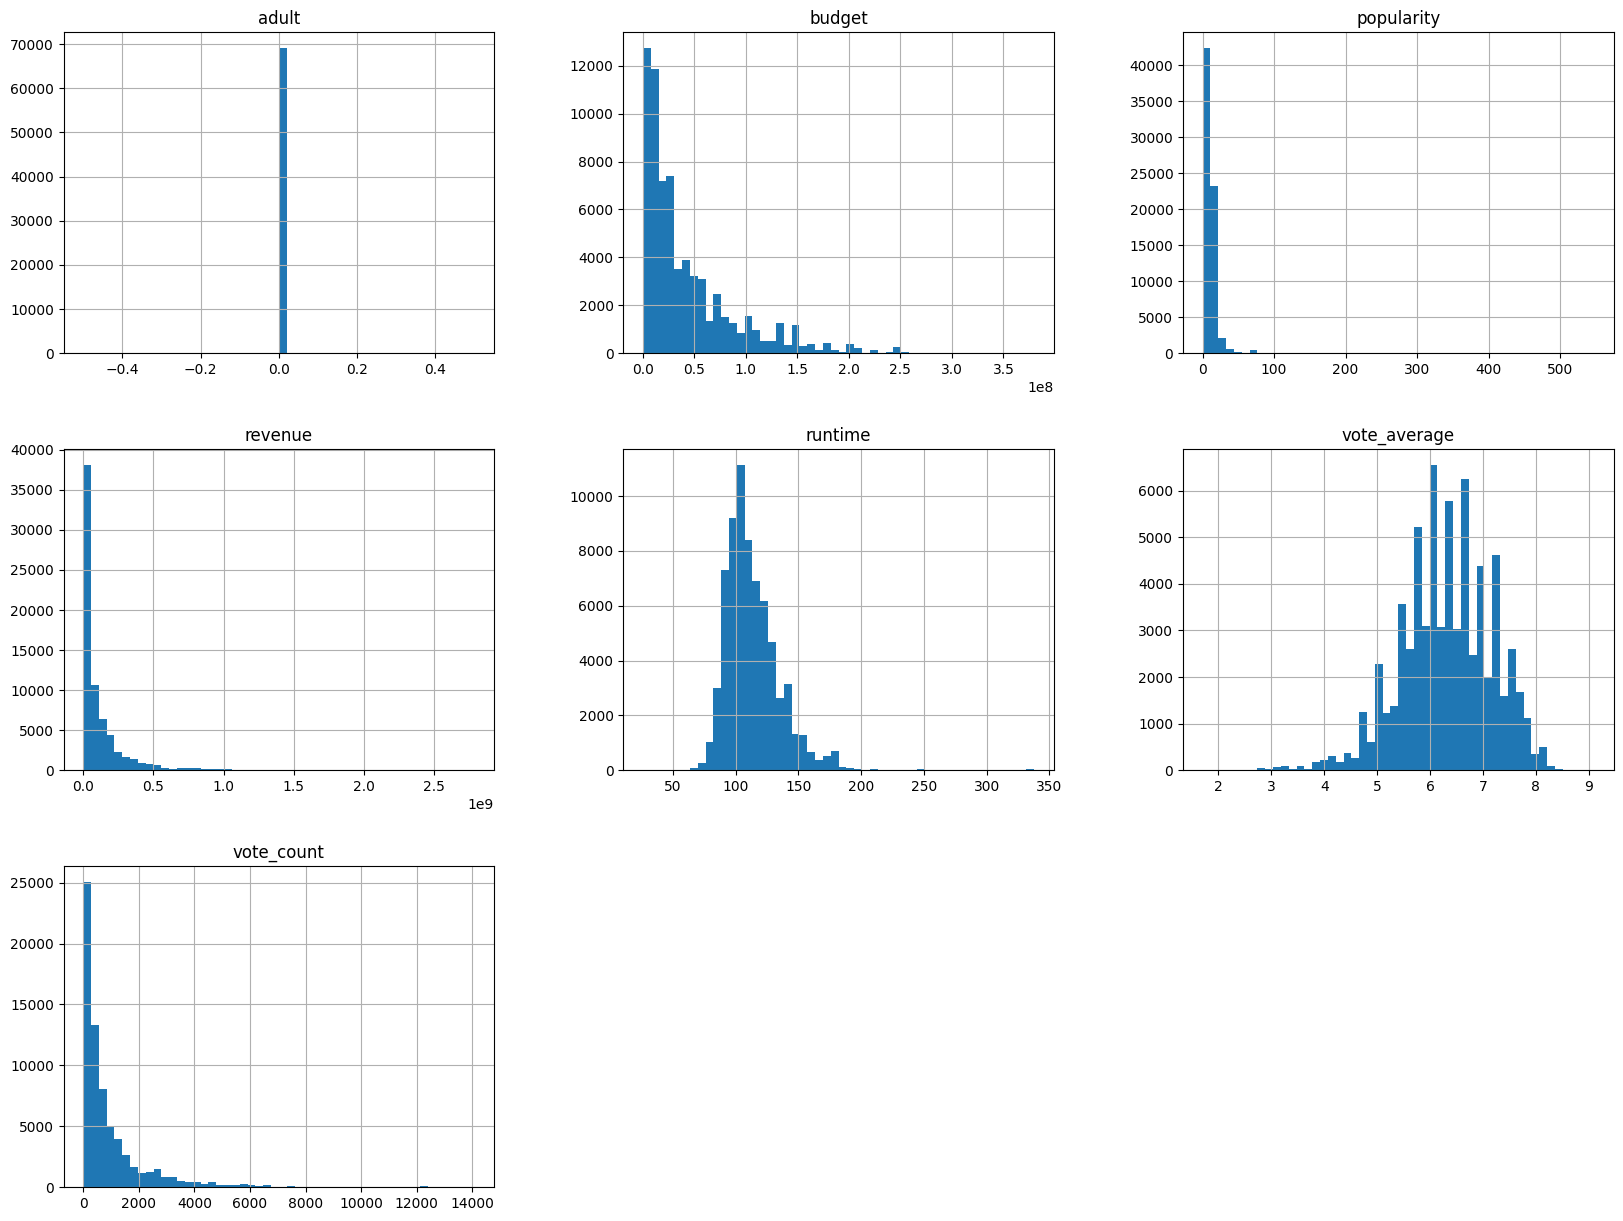

In [45]:
cleaned_data.hist(bins=50, figsize=(20,15))
plt.show()

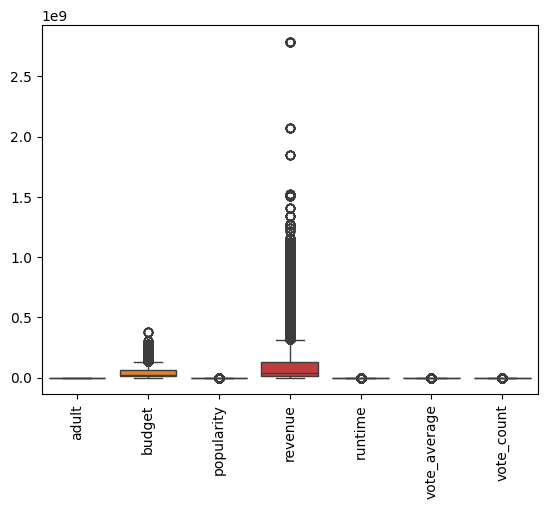

In [46]:
sns.boxplot(data=cleaned_data)
plt.xticks(rotation=90)
plt.show()

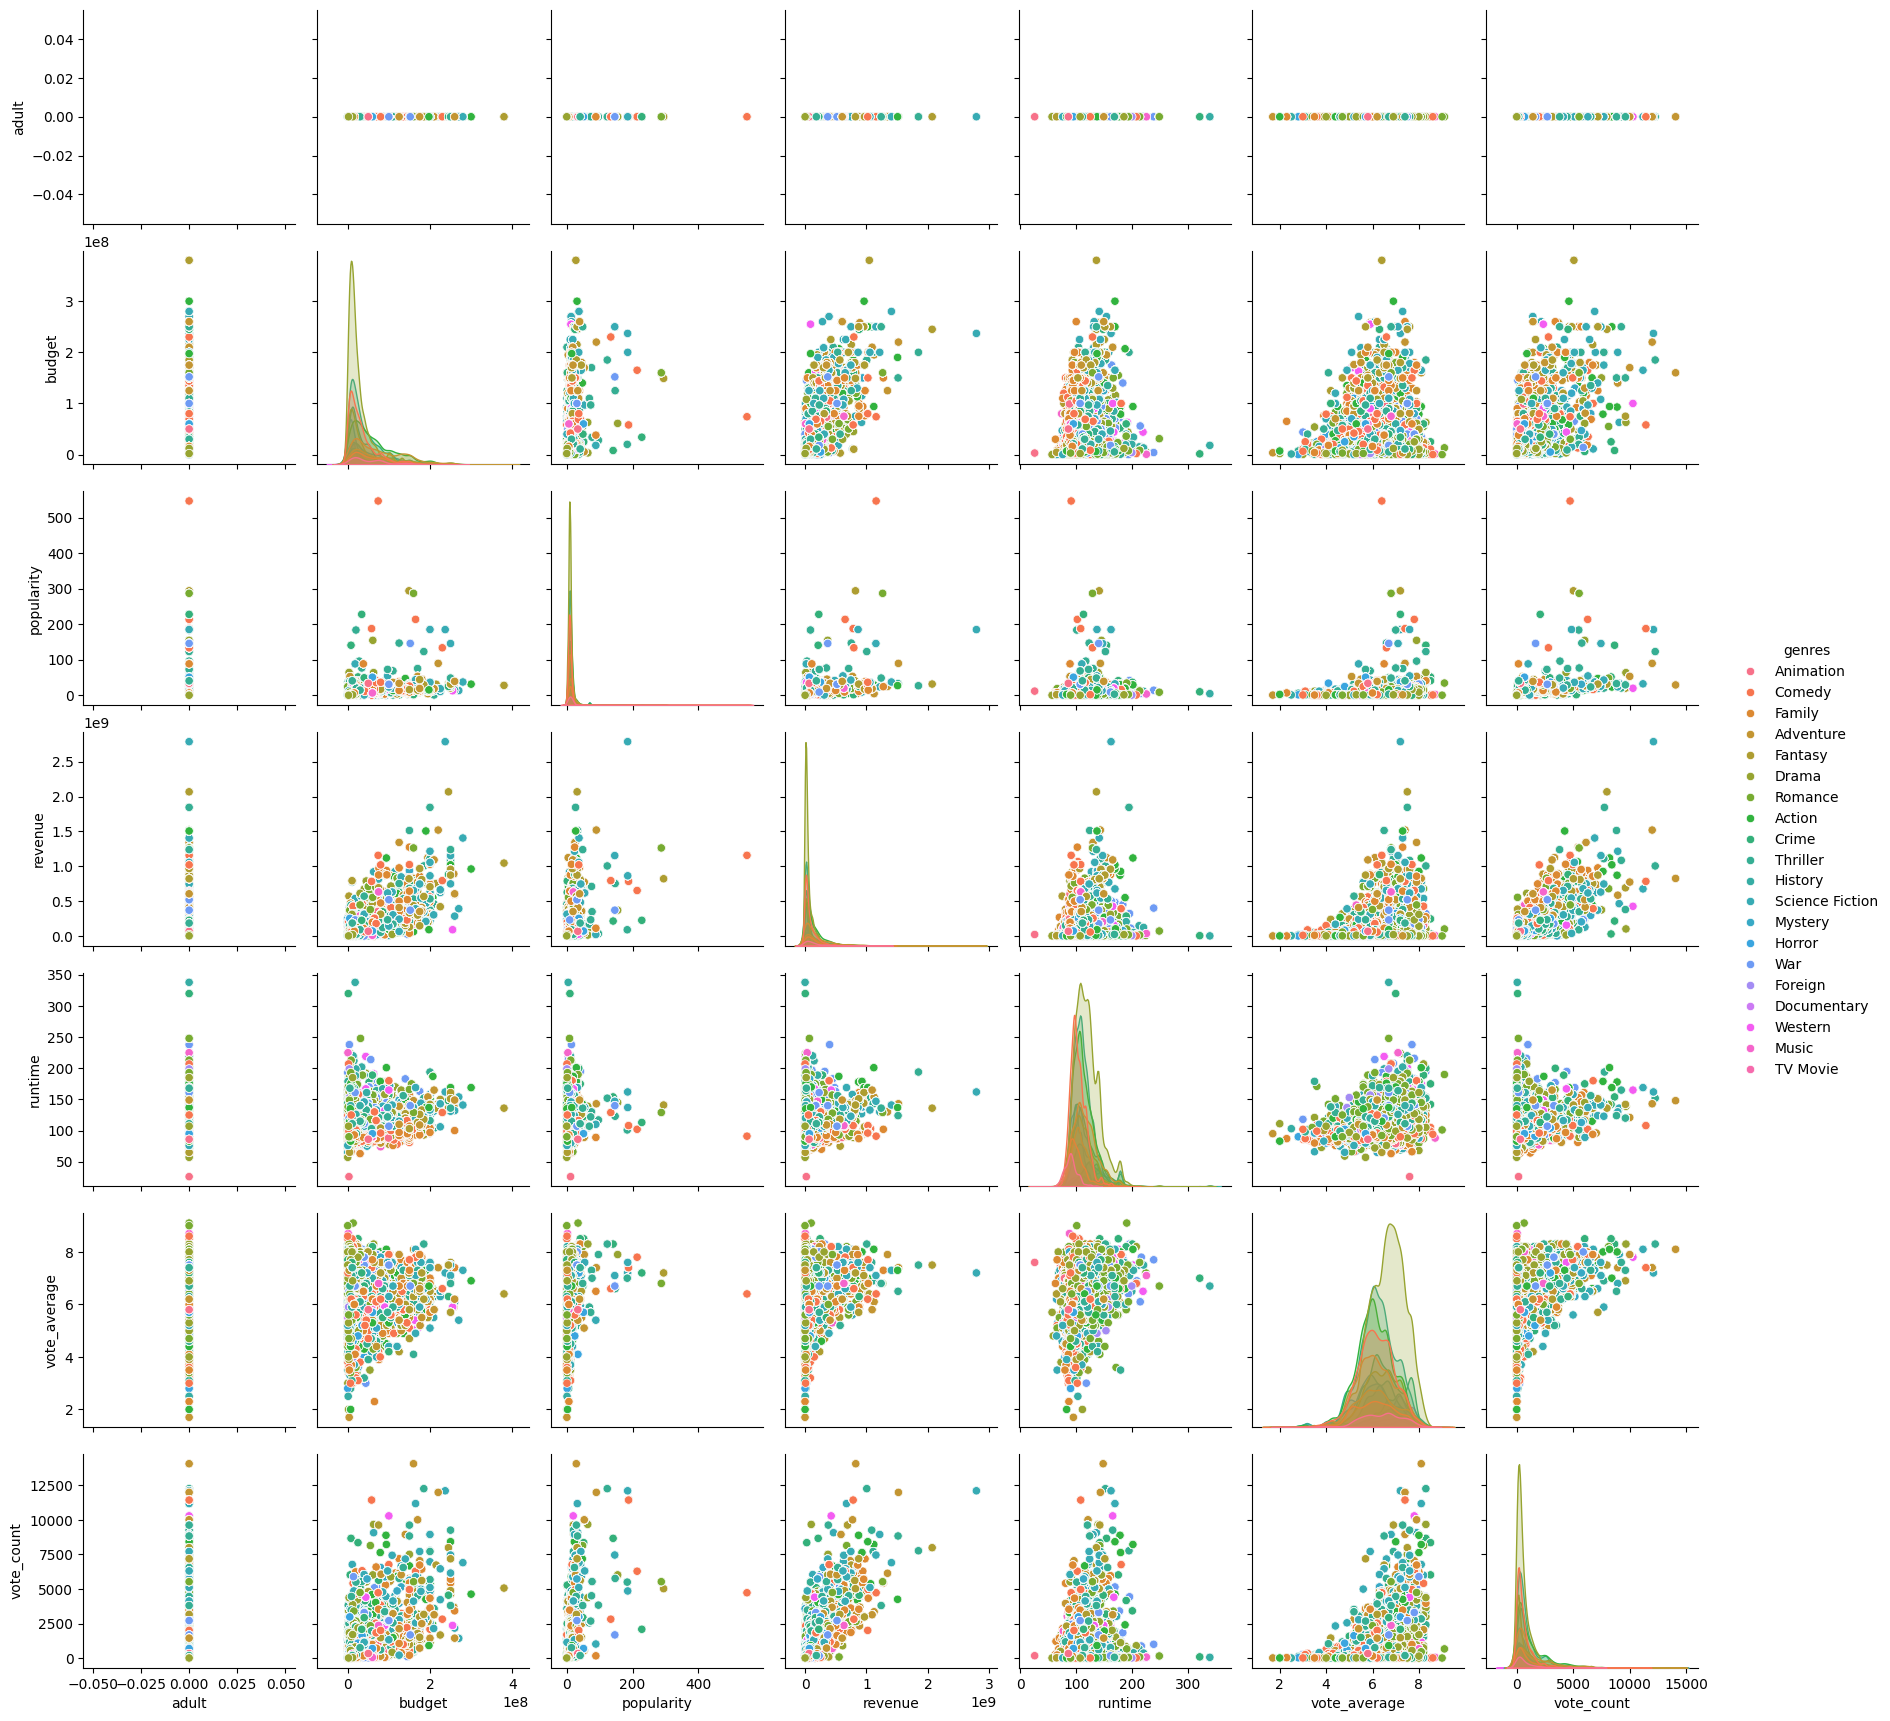

In [47]:
sns.pairplot(cleaned_data, hue = 'genres')
plt.show()

In [48]:
X = cleaned_data[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']]
y = cleaned_data['revenue']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SGD Regressor

In [50]:
sgd_model = SGDRegressor()
sgd_model.fit(X_train, y_train)
sgd_predictions = sgd_model.predict(X_test)

In [51]:
print("SGD Regressor Metrics:")
m_s_e = mean_squared_error(y_test, sgd_predictions)
print("MSE:", m_s_e)
m_a_e = mean_absolute_error(y_test, sgd_predictions)
print("MAE:", m_a_e)
r2 = r2_score(y_test, sgd_predictions)
print("R-squared:", r2)


SGD Regressor Metrics:
MSE: 5.474991124840384e+46
MAE: 1.5889785145390597e+23
R-squared: -1.5528421635473103e+30


In [52]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (55372, 5)
Shape of y_train: (55372,)


### SGD Classifier

In [61]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(random_state = 42)

# Fit the model
sgd_classifier.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(random_state=42)

Making predictions

In [62]:
y_pred = sgd_classifier.predict(X_test)

Calculate the Metrics

In [63]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

class_report = classification_report(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [65]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nF1 Score:")
print(f1)
print("\nRecall:")
print(recall)

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

F1 Score:
1.0491424624254874e-08

Recall:
7.22334585379948e-05


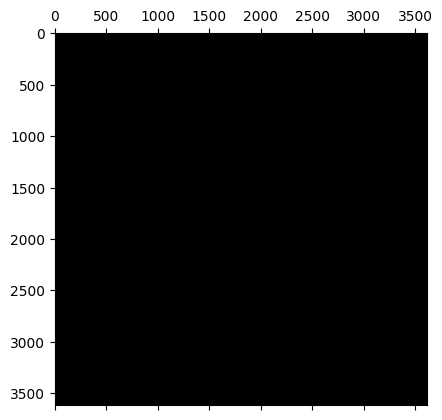

In [66]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

In [55]:
Fail

NameError: name 'Fail' is not defined

In [ ]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
num_attribs = ['adult', 'budget', 'runtime', 'popularity', 'vote_average', 'vote_count']
cat_attribs = ['genres', 'production_companies', 'production_countries']

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), 
        ("cat", categorical_transformer, cat_attribs), 
    ])

In [ ]:
X = movies_df[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'genres']]
y = movies_df['revenue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
columns_to_encode = ['genres']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), columns_to_encode),
    ],
    remainder='passthrough')

In [ ]:
non_numeric_values = X_train['genres'].apply(lambda x: isinstance(x, str) and not x.isnumeric())

print(non_numeric_values)

In [ ]:
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train_encoded) 

X_test_imputed = imputer.transform(X_test_encoded)

In [ ]:
missing_values = y_train.isnull().sum()
print("Number of missing values in y_train:", missing_values)

In [ ]:
print(X_train.columns)

In [ ]:
y_train = y_train.dropna()
y_test = y_test.dropna()

In [ ]:
X_train_prepared= full_pipeline.fit_transform(X_train)

In [ ]:
X_train_prepared= full_pipeline.fit_transform(X_train)

In [ ]:
print("Shape of X_train_prepared:", X_train_prepared.shape)

In [ ]:
print("Data type of X_train_prepared:", type(X_train_prepared))

In [ ]:
print("First few rows of X_train_prepared:")
X_train_prepared[:5]

In [ ]:
print("Data contains sequences or irregularities:", any(isinstance(row, list) for row in X_train_prepared))

In [ ]:
valid_indices = ~np.isnan(y_train)

# Filter X_train_prepared and y_train
X_train_valid = X_train_prepared[valid_indices]
y_train_valid = y_train[valid_indices]

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_valid, y_train_valid)

In [ ]:
X_val_prepared = full_pipeline.transform(X_val)

In [ ]:
print("Predictions: ", lin_reg.predict(X_val_prepared))